In [ ]:
"""Licensed under the Apache License, Version 2.0."""

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
import pandas as pd

# Library of analysis code common to experiments.
import protseq_analysis

In [ ]:
# Download the dataset from:
# Jess, Phillip (2021), “ProtSeq Data”, Mendeley Data, V1, doi: 10.17632/f9hdn5xc3v.1
# https://data.mendeley.com/datasets/f9hdn5xc3v/1

!wget https://data.mendeley.com/public-files/datasets/f9hdn5xc3v/files/882faf53-004e-4d44-b3b7-93ae8d6e82ba/file_downloaded -O "Single cycle DNA_DNA BCS Base calls.fastq.gz"
!wget https://data.mendeley.com/public-files/datasets/f9hdn5xc3v/files/8e9f2979-e85a-48af-9876-c3dc93602551/file_downloaded -O "Single cycle DNA_DNA BCS undetermined calls.fastq.gz"

In [ ]:

expt_dict = {
    'base': ['Single cycle DNA_DNA BCS Base calls.fastq.gz'],
    'undertermined': ['Single cycle DNA_DNA BCS undetermined calls.fastq.gz'],
}

component_names_str = '''
5Phos.O1_BCS4_Fd7	ATCAAGGC
5Phos.O1_BCS4_Fd8	CTAGTACG
5Phos.O1_BCS4_Fd11	TGCGTACA
5Phos.O1_BCS4_Fd12	TGCAAACG
SP9.T25_BCS4_Fd13	CGGAAAGA
SP9.T25_BCS4_Fd14	GTGAGCAA
SP9.T25_BCS4_Fd15	CGTAACTC
SP9.T25_BCS4_Fd16	CTATATCA
SP6.O1_BCS4_Fd17	TCTAAGGT
SP6.O1_BCS4_Fd18	AAGCAACT
SP6.O1_BCS4_Fd19	TGGTACCT
SP6.O1_BCS4_Fd20	CGTAAGTG
AV.B4.U2.SA1.2	TGCTTGCCTGGT
AV.B4.U2.SA1.3	CTTGTATCTAGG
AV.B4.U2.SA2.3	AATGCCGAAGGT
AV.B4.U2.SA4.2	ACGTCGCCAATT
'''

subseqs, component_dict, _ = protseq_analysis.get_subseqs_from_component_names(component_names_str)
foundation_dict = protseq_analysis.get_foundation_dict(component_dict)
full_df = protseq_analysis.read_fastqs_for_experiment(expt_dict, num_reads=100000000, subseqs=subseqs, n_common=50000000, dist_for_clustering=0)

In [ ]:
cycle_dfs, cycle_correspondence = protseq_analysis.foundation_partner_cycle_table(full_df, foundation_dict,
                                                                          component_dict, cycles_to_check=1, heatmap=False,
                                                                          allow_overlaps=False)
first_cycle_df = cycle_dfs[1]
first_cycle_df['binder'] = ['SP4.1 (Neg. Ctrl)', 'SP4.2 (Neg. Ctrl)', 'SP6', 'SP9']
plot_df = protseq_analysis.make_plot_df(first_cycle_df)

In [ ]:
def get_foundation(s):
  if s == 'Empty_Foundation':
    return 'Empty'
  else:
    return s.split('_')[-1]

def pivot_plot_df(plot_df):
  df = plot_df.copy()
  df['Target Foundation'] = df['target'].map(get_foundation)
  return pd.pivot(df, columns=['Binder Target', 'Target Foundation'], values='Count', index='Binder for').astype(int)

plot_df_pivoted = pivot_plot_df(plot_df)
with pd.option_context("display.max_rows", 1000):
  display.display(plot_df_pivoted)

Binder Target     5Phos                 Empty  ...    SP6    SP9                    
Target Foundation  Fd11 Fd12   Fd7  Fd8 Empty  ...   Fd20   Fd13   Fd14   Fd15  Fd16
Binder for                                     ...                                  
SP4.1 (Neg. Ctrl)     0    0     0    0     0  ...      1      0      1      0     1
SP4.2 (Neg. Ctrl)     0    0     2    0     0  ...      0      1      1      0     0
SP6                 117   84   935   76     0  ...  18751     83    100     54    21
SP9                 205  152  1768  191     0  ...    252  28256  62962  11395  6234

[4 rows x 13 columns]

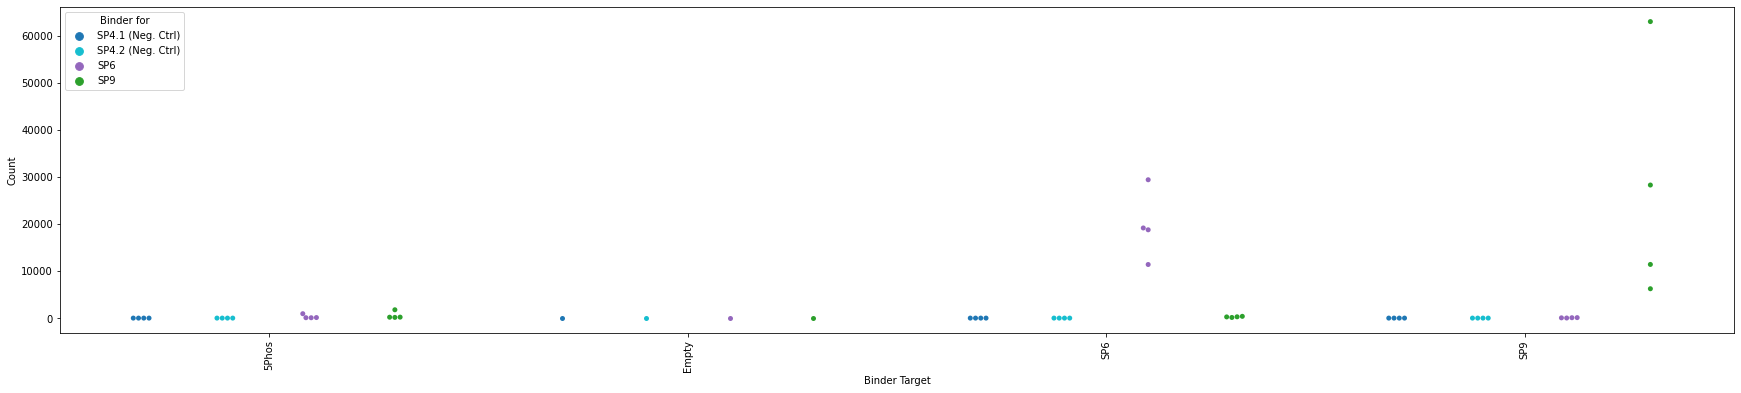

In [ ]:
def do_plot(plot_df, palette):
  plot_agg_df = plot_df.groupby(['Binder Target', 'target', 'Binder for']).sum().reset_index()
  plt.figure(figsize=(30,6))
  # plt.figure(figsize=(4.75, 2))  # Size for figure in paper.
  g = sns.swarmplot(data=plot_agg_df, palette=palette,
                    x='Binder Target', y='Count', hue='Binder for', dodge=True)
  g.set_xticklabels(g.get_xticklabels(), rotation=90) 
  plt.show()


do_plot(plot_df, palette={'SP6':'tab:purple',
                          'SP9': 'tab:green',
                          'SP4.1 (Neg. Ctrl)': 'tab:blue',
                          'SP4.2 (Neg. Ctrl)': 'tab:cyan'})